In [5]:
from sklearn.datasets import load_iris
import torch
from torch import nn as nn
from torch import optim 
%matplotlib inline
import matplotlib.pyplot as plt
iris = load_iris()

In [163]:
x = iris.data[:100]
y = iris.target[:100]

In [164]:
x = torch.tensor(x,dtype = torch.float32)
y = torch.tensor(y,dtype = torch.float64)

In [165]:
net = nn.Linear(4,1)

In [166]:
loss_fn = nn.BCEWithLogitsLoss()

In [167]:
optimizer = optim.SGD(net.parameters(),lr=0.15)

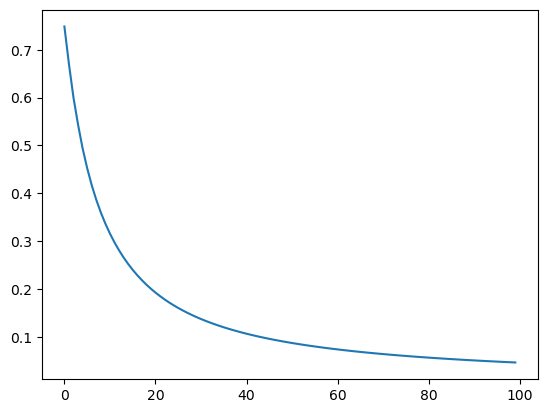

In [168]:
losses = []
for epoch in range(100):
    optimizer.zero_grad()
    
    y_pred = net(x)
    
    loss = loss_fn(y_pred.view_as(y),y)
    loss.backward()
    
    optimizer.step()
    losses.append(loss.item())
    
plt.plot(losses)

In [169]:
h = net(x)

In [170]:
prob = torch.sigmoid(h)

In [171]:
y_pred = prob >0.5

In [172]:
(y.byte() == y_pred.view_as(y)).sum().item()

100

In [173]:
y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
x = digits.data
y = digits.target
y.shape

(1797,)

In [6]:
x = torch.tensor(x,dtype = torch.float32)
y = torch.tensor(y,dtype = torch.int64)

In [26]:
net = nn.Linear(x.size()[1],2)

In [27]:
loss_fn = nn.CrossEntropyLoss()

In [28]:
optimizer = optim.SGD(net.parameters(),lr=0.01)

In [29]:
losses = []
for epoch in range(100):
    optimizer.zero_grad()
    
    y_pred = net(x)
    
    loss = loss_fn(y_pred,y)  
    loss.backward()
    
    optimizer.step()
    losses.append(loss.item())

# _,y_pred =torch.max(y_pred,1)
y_pred.shape

torch.Size([1797, 10])